Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.ndimage
import matplotlib.pyplot as plt

Leitura e Separação dos dados

In [2]:
geoGold = pd.read_csv('geoGold_erro.csv')

In [3]:
geoGold.head()

,Unnamed: 0.1,number_x,CEP,street,bairro,city,state,lonGold,latGold,id,Unnamed: 0,geoapi_id,request_id,lat,long,accuracy,number_y,district,public_place,erro
0,0,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,0,OpenRouteService,2767600,-19.833723,-44.009705,0.800000,73,NaN,RUA CARLOS LACERDA,0.124175
1,1,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,1,TomTom,2767600,-19.833170,-44.008610,14.282460,73,NaN,RUA CARLOS LACERDA,0.007276
2,2,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,2,Google,2767600,-19.833137,-44.008699,NaN,73,NaN,RUA CARLOS LACERDA,0.003482
3,3,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,3,MapBox,2767600,-19.833161,-44.008679,0.795556,73,NaN,RUA CARLOS LACERDA,0.000053
4,4,18,30240500.0,RUA PEDRO JOSE MOREIRA,Bairro São Lucas,BELO HORIZONTE,MG,-43.914159,-19.929574,2767601,4,MapBox,2767601,-19.929574,-43.914159,0.801728,18,NaN,RUA PEDRO JOSE MOREIRA,0.000022


In [4]:
#Separando os dataframes para plotar nos gráficos

mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
google = geoGold[geoGold['geoapi_id'] == 'Google']
tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']

m = np.asarray(mapbox['erro'].tolist())
min_m = np.min(m)
max_m = np.max(m)

g = np.asarray(google['erro'].tolist())
min_g = np.min(g)
max_g = np.max(g)

t = np.asarray(tomtom['erro'].tolist())
min_t = np.min(t)
max_t = np.max(t)

o = np.asarray(ors['erro'].tolist())
min_o = np.min(o)
max_o = np.max(o)

minimo = np.min(np.asanyarray([min_m, min_g, min_t, min_o]))
maximo = np.max(np.asanyarray([max_m, max_g, max_t, min_o]))



Mapbox

C:\Users\analu\AppData\Local\Temp\ipykernel_10116\1756660606.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


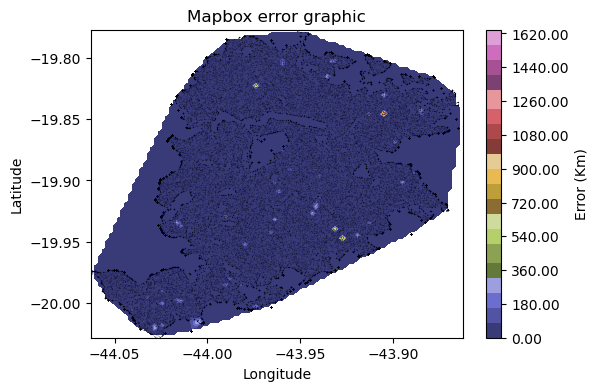

In [5]:
# Leitura dos dados de altitude do dataframe mapbox
x = np.asarray(mapbox['lonGold'].tolist())
y = np.asarray(mapbox['latGold'].tolist())
z = np.asarray(mapbox['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 100)
y_arr = np.linspace(np.min(y), np.max(y), 100)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do contorno com escala completa de cores
contono = ax.contourf(x_mesh, y_mesh, z_mesh, levels=100, cmap='tab20b')
cbar = fig.colorbar(contono, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.1, alpha=0.3)
plt.title('Mapbox error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


Google

C:\Users\analu\AppData\Local\Temp\ipykernel_10116\3467900565.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


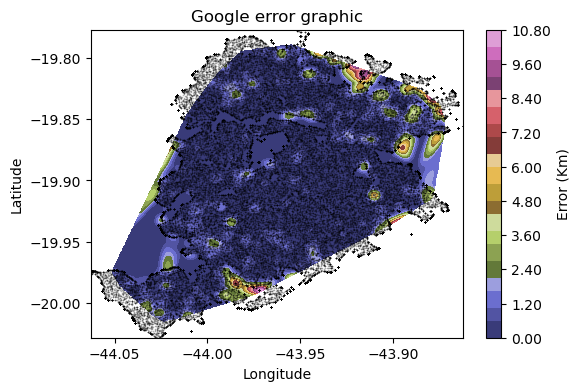

In [6]:
# Leitura dos dados de altitude do dataframe mapbox
x = np.asarray(google['lonGold'].tolist())
y = np.asarray(google['latGold'].tolist())
z = np.asarray(google['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do contorno com escala completa de cores
contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')


plt.plot(x, y, 'x', color='black', markersize=0.5, alpha=0.3)
plt.title('Google error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


TomTom

C:\Users\analu\AppData\Local\Temp\ipykernel_10116\1492823333.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


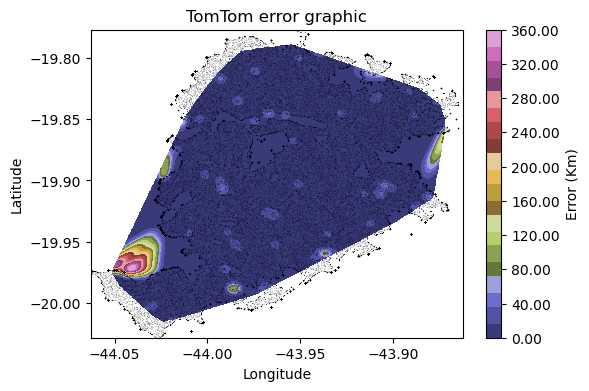

In [7]:
# Leitura dos dados de altitude do dataframe tomtom
x = np.asarray(tomtom['lonGold'].tolist())
y = np.asarray(tomtom['latGold'].tolist())
z = np.asarray(tomtom['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do contorno com escala completa de cores
contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.1, alpha=0.3)
plt.title('TomTom error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

ORS

C:\Users\analu\AppData\Local\Temp\ipykernel_10116\2990150135.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')


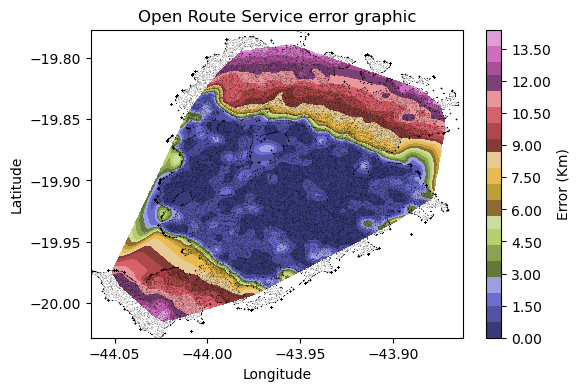

In [8]:
# Leitura dos dados de altitude do dataframe tomtom
x = np.asarray(ors['lonGold'].tolist())
y = np.asarray(ors['latGold'].tolist())
z = np.asarray(ors['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

fig, ax = plt.subplots(figsize=(6, 4))

contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.1, alpha=0.3)
plt.title('Open Route Service error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Gráficos de Erro e falhas utilizando gráfico Hexograma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [29]:
limite = 0.3

geoGold = pd.read_csv('geoGold_erro.csv')

def determinar_falha(erro):
    if erro <= 0.15:
        return 0.0
    else:
        return 1.0

falha =  geoGold['erro'].apply(determinar_falha)

geoGold['falha'] = falha

geoGold.name = 'Todas as APIs'
geoGoldL = geoGold[geoGold['erro'] < limite]
geoGoldL.name = 'Todas as APIs'


mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
mapbox.name = 'Mapbox'
mapboxL = mapbox[mapbox['erro'] < limite]
mapboxL.name = 'Mapbox'

google = geoGold[geoGold['geoapi_id'] == 'Google']
google.name = 'Google Maps'
googleL = google[google['erro'] < limite]
googleL.name = 'Google Maps'

tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
tomtom.name = 'TomTom'
tomtomL =  tomtom[tomtom['erro'] < limite]
tomtomL.name = 'TomTom'

ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']
ors.name = 'Open Route Service'
orsL = ors[ors['erro'] < limite]
orsL.name = 'Open Route Service'


In [30]:
apis = [ geoGold, mapbox, google, tomtom, ors]
apisL = [geoGoldL, mapboxL, googleL, tomtomL, orsL]

In [2]:
shapefile_path = 'https://github.com/rcpsilva/UncertaintyQuantificationForGeocodingServices/raw/main/PaperGeoinfo/results/SMunicipios_2022/MG_Municipios_2022.shp'
gdf = gpd.read_file(shapefile_path)
city_name = "Belo Horizonte"  # Replace with the actual city name you want to plot
city_gdf = gdf[gdf['NM_MUN'] == city_name]


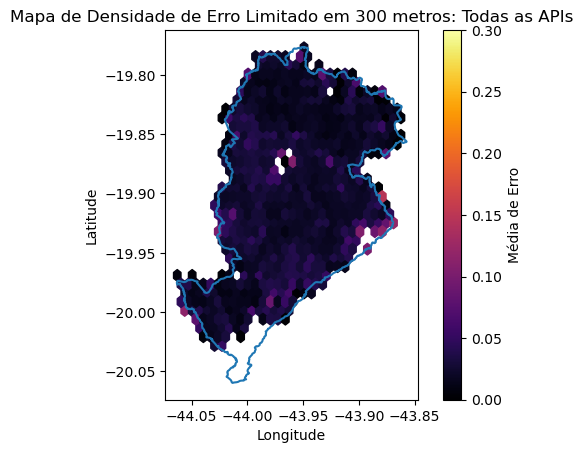

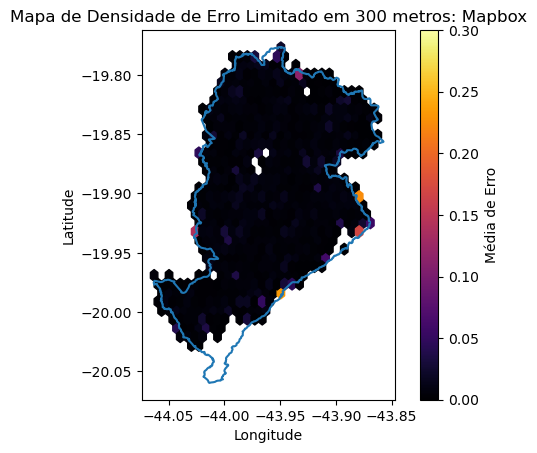

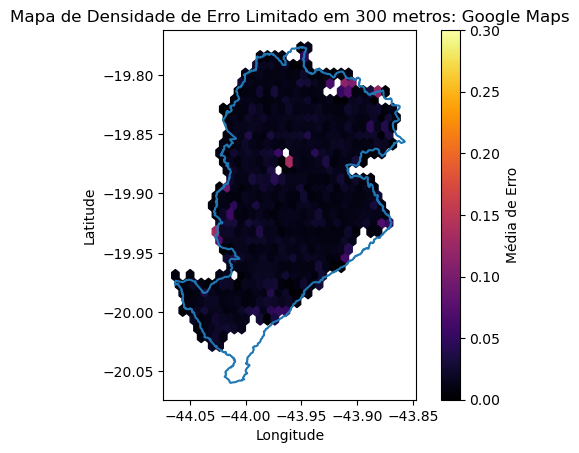

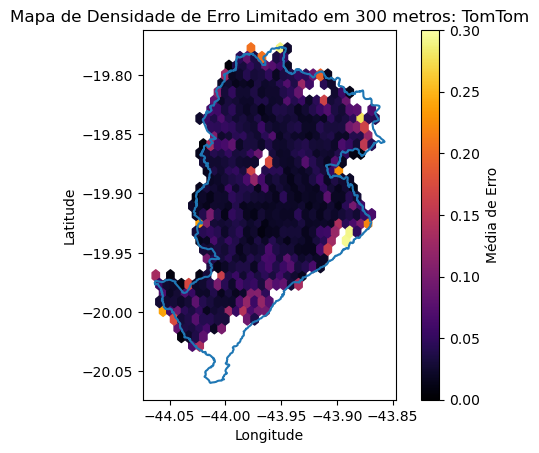

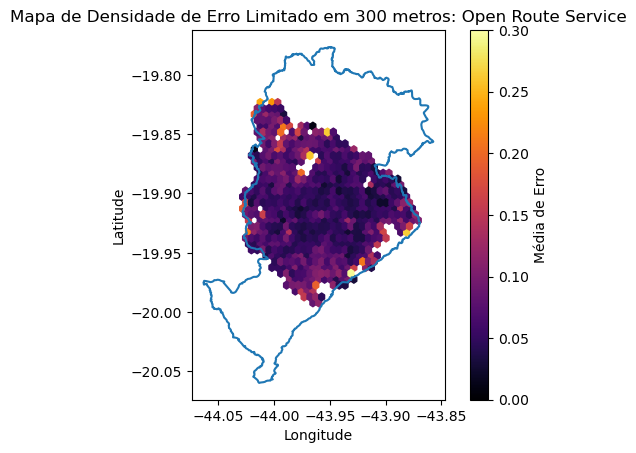

In [32]:

gridsize = 30

for api in apisL:
    city_gdf.boundary.plot()
    hb = plt.hexbin(api['lonGold'], api['latGold'], C=api['erro'], gridsize=gridsize, cmap='inferno',reduce_C_function=np.mean)
    cb = plt.colorbar()
    cb.set_label('Média de Erro')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mapa de Densidade de Erro Limitado em 300 metros: {}'.format(api.name))
    plt.clim(vmin=0, vmax=0.3)
    plt.show()


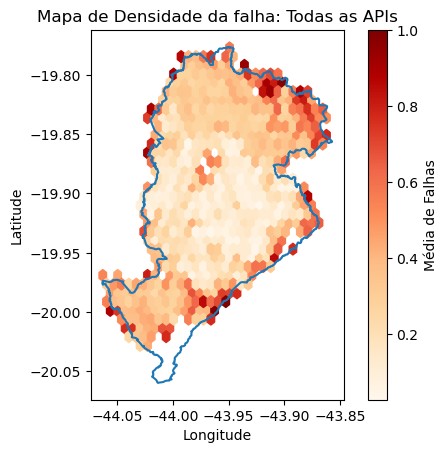

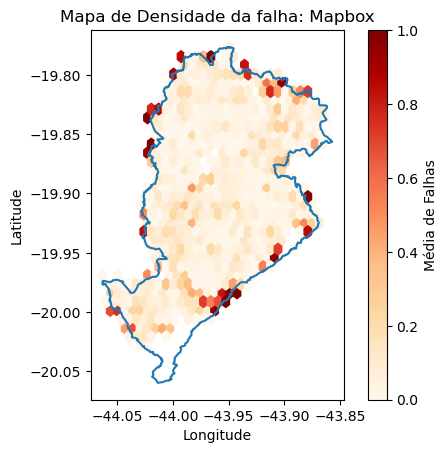

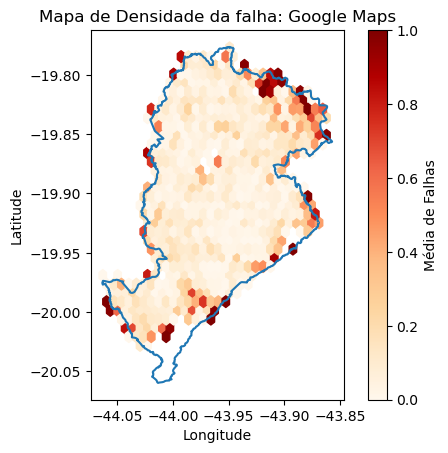

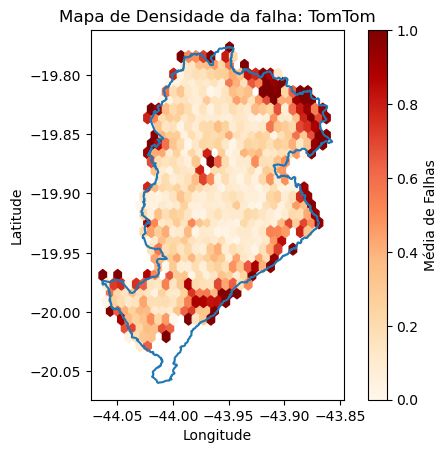

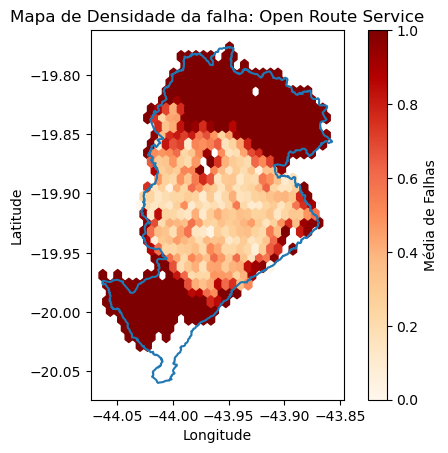

In [27]:

gridsize = 30

for api in apis:
    city_gdf.boundary.plot()
    hb = plt.hexbin(api['lonGold'], api['latGold'], C=api['falha'], gridsize=gridsize, cmap='OrRd',reduce_C_function=np.mean)
    cb = plt.colorbar()
    cb.set_label('Média de Falhas')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mapa de Densidade da falha: {}'.format(api.name))

    plt.show()

In [3]:
bhTotal = pd.read_csv('baseBHtransformada.csv')
bhTotal = bhTotal[['LATITUDE', 'LONGITUDE']].rename(columns={'LATITUDE': 'y', 'LONGITUDE': 'x'})
bhTotal.name = 'completa'

bhAmostra = pd.read_csv('amostraBH.csv')
bhAmostra = bhAmostra[['LATITUDE', 'LONGITUDE']].rename(columns={'LATITUDE': 'y', 'LONGITUDE': 'x'})
bhAmostra.name = 'amostrada'

#geoGold_d = geoGold[]

plots = [bhTotal, bhAmostra]



In [41]:
geoGold.head(2)

,Unnamed: 0.1,number_x,CEP,street,bairro,city,state,lonGold,latGold,id,...,geoapi_id,request_id,lat,long,accuracy,number_y,district,public_place,erro,falha
0,0,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,...,OpenRouteService,2767600,-19.833723,-44.009705,0.80000,73,NaN,RUA CARLOS LACERDA,0.124175,0.0
1,1,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,...,TomTom,2767600,-19.833170,-44.008610,14.28246,73,NaN,RUA CARLOS LACERDA,0.007276,0.0


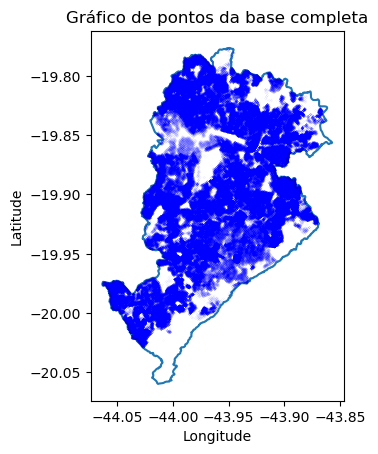

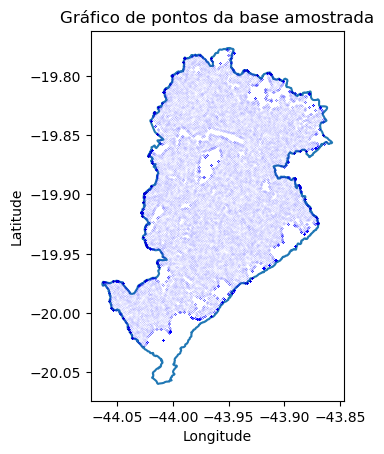

In [4]:
for p in plots:
    city_gdf.boundary.plot()
    plt.plot( p['y'],p['x'], '.', color='blue', markersize=0.1, alpha=0.3)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Gráfico de pontos da base {}'.format(p.name))

    plt.show()
